In [1]:
# menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# memanggil data set lewat gdrive
path = "/content/gdrive/MyDrive/Praktikum/Praktikum5"

In [3]:
# Import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [4]:
# membaca file csv menggunakan pandas
df = pd.read_csv(path + '/Data/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#  Cek info dataset
print("Jumlah data:", len(df))
print("\nCek data kosong:\n", df.isnull().sum())
print("\nLihat 5 baris pertama:\n", df.head())


Jumlah data: 150

Cek data kosong:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Lihat 5 baris pertama:
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [6]:
#  Pisahkan fitur (X) dan target (y)
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

In [7]:
#  Bagi data menjadi 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Jumlah data training:", len(X_train))
print("Jumlah data testing:", len(X_test))

Jumlah data training: 120
Jumlah data testing: 30


In [8]:
#  Buat model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [9]:
#  Prediksi data testing
y_pred = model.predict(X_test)

In [10]:
#  Evaluasi model
print("🔹 Akurasi model:", accuracy_score(y_test, y_pred))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🔹 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


🔹 Akurasi model: 1.0

🔹 Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


🔹 Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


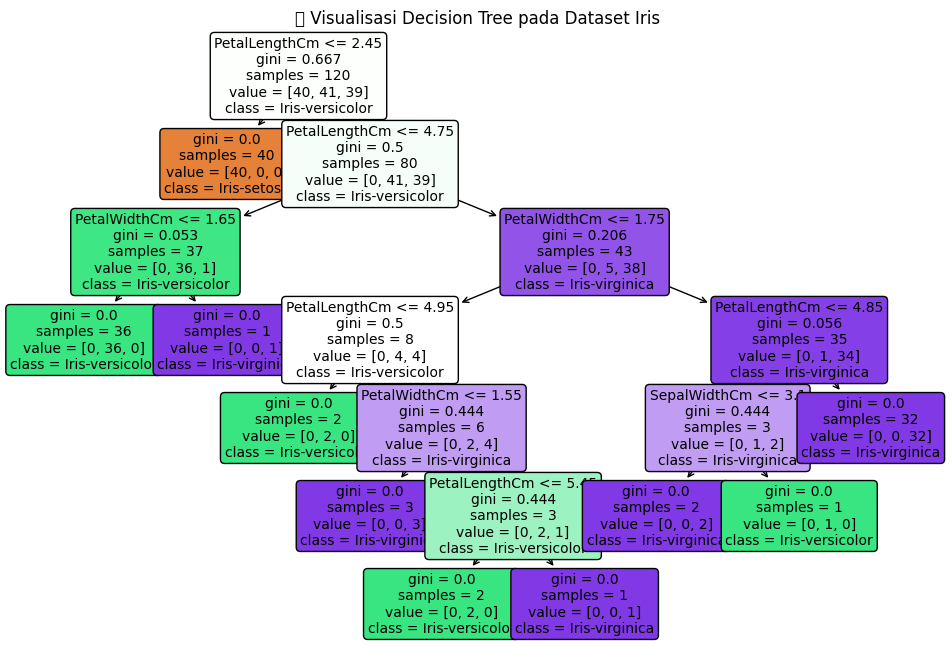

In [11]:
#  Visualisasi Pohon Keputusan
plt.figure(figsize=(12, 8))
plot_tree(model,
          feature_names=X.columns,
          class_names=model.classes_,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("🌳 Visualisasi Decision Tree pada Dataset Iris")
plt.show()


In [12]:
# Uji prediksi pada satu data testing
sample = X_test.iloc[0:1]
print("Data uji:\n", sample)
print("\nHasil prediksi model:", model.predict(sample))
print("Label sebenarnya:", y_test.iloc[0])


Data uji:
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
73            6.1           2.8            4.7           1.2

Hasil prediksi model: ['Iris-versicolor']
Label sebenarnya: Iris-versicolor


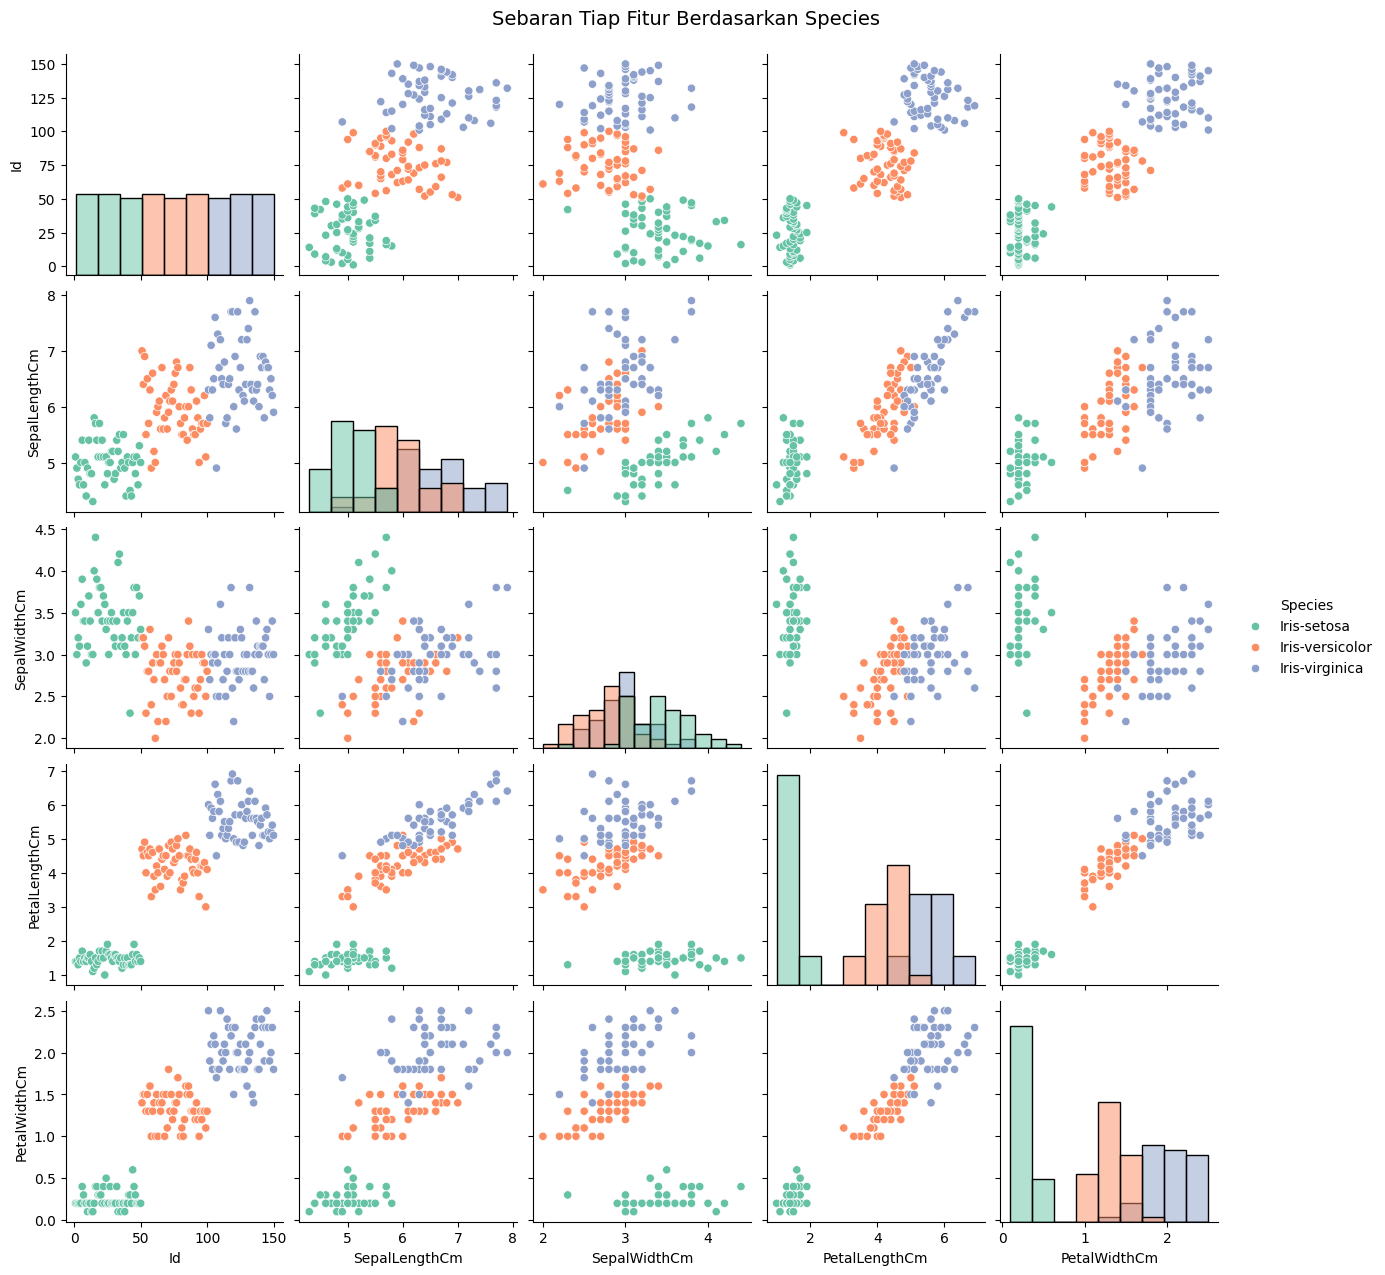

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi hubungan antar fitur berdasarkan species
sns.pairplot(df, hue='Species', diag_kind='hist', palette='Set2')

plt.suptitle("Sebaran Tiap Fitur Berdasarkan Species", y=1.02, fontsize=14)
plt.show()
